In [28]:
from google.colab import drive
drive.mount("/content/drive")

import numpy as np
import pandas as pd
train_df = pd.read_csv("/content/drive/MyDrive/AI/train_test_csv/nlp-getting-started/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/AI/train_test_csv/nlp-getting-started/test.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


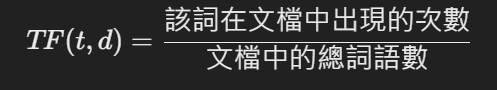
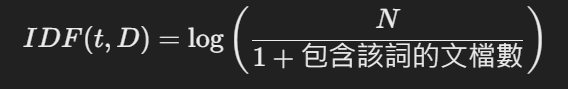
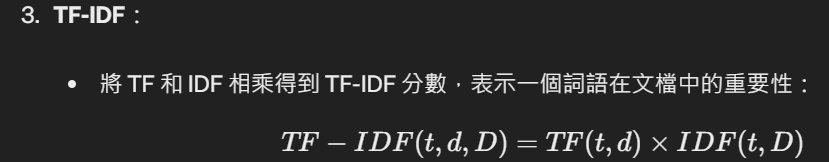

In [29]:
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

#CountVectorizer運作原理
#["我", "你", "喜歡", "吃", "蘋果", "橘子"]

#我 喜歡 吃 蘋果
#你 喜歡 吃 橘子

#[1, 0, 1, 1, 1, 0]

#[0, 1, 1, 1, 0, 1]。

#結合CountVectorizer 和 TF-IDF
Tfidf_Vectorizer = TfidfVectorizer()

In [30]:
#處理資料

#訓練集要fit(擬和)
train_vectors = Tfidf_Vectorizer.fit_transform(train_df["text"])

#測試集不用
test_vectors = Tfidf_Vectorizer.transform(test_df["text"])

In [31]:
#嶺迴歸（Ridge Regression）來構建模型，這樣可以在減少一些特徵（詞）對模型影響的同時，不完全忽略任何特徵
clf = linear_model.RidgeClassifier()
clf.fit(train_vectors, train_df["target"])

RidgeClassifier()

In [32]:
#cv=3 表示將數據集分成 3 個摺（folds）。數據集會被分成 3 份，每次選其中 1 份作為驗證集，剩下的 2 份作為訓練集，重複 3 次
scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=3, scoring="f1")
scores #三次分割的分數

array([0.63366337, 0.6122449 , 0.68407835])

In [33]:
sample_submission = pd.read_csv("/content/drive/MyDrive/AI/train_test_csv/nlp-getting-started/sample_submission.csv")
sample_submission["target"] = clf.predict(test_vectors)
sample_submission.head()
sample_submission.to_csv("submission.csv", index=False)



---

